## Student Name:Ganapathy S
## Student ID:18202799

Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

 - Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
 - Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
 - Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
 - Store those results from your fit method that are required to transform the data set, in suitable class properties.
 - Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.


- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y = 10

In [3]:
data = np.array([[n*(1+a_x*(rand.random()-0.5)), 4*n + a_y *
                  (rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


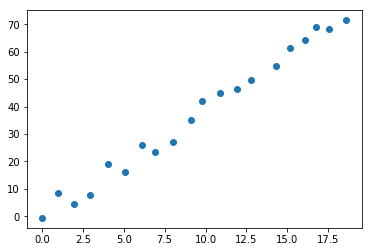

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Development of my own PCA class

In [5]:
class PCA_own:

    def __init__(self, n_components=None):
        # Setting up the property of class of number of components similar to sklearn library
        self.n_components = n_components

    def fit(self, X):
        # Storing the number of observations and number of columns from the dataset
        n_samples, n_features = X.shape
        if self.n_components == None:
            # Error message in case number of components is not provided
            raise ValueError("Please mention the number of components")
        elif self.n_components > n_features:
            # Error message in case number of components are greater than number of features
            raise ValueError(
                "Number of components can not be greater than number of features")
        else:
            X = X - np.mean(X, axis=0)
            # Standardize the input data
            cov = np.cov(X, rowvar=False)
            # calculate the covariance matrix

            eigen_value, eigen_vector = np.linalg.eig(cov)
            # calculate the eigen value and eigen vectors of the covariance matrix

            idx = np.argsort(eigen_value)[::-1]
            # getting the index to sort the eigen values in the descending order

            eigen_value = eigen_value[idx]
            # sorting the eigen value vector using the index created above

            eigen_vector = eigen_vector[:, idx]
            # reordering the eigen vector as well in the same order

            eigen_vector = eigen_vector[:, :self.n_components]
            # Taking as many values of eigen vectors as many components are needed

            self.explained_variance_ratio_ = eigen_value / eigen_value.sum()
            self.explained_variance_ratio_ = self.explained_variance_ratio_[
                :self.n_components]
            # calculating the percentage variance explained by various components of PCA

            # Storing the eigen values and vectors as class attributes so as to use them in transform method
            self.eigen_value = eigen_value
            self.eigen_vector = eigen_vector

            return self.eigen_value, self.eigen_vector
            # return the final eigen value and vector for further use

    def transform(self, X):

        n_samples, n_features = X.shape

        if self.n_components == None:
            # Error message in case number of components is not provided
            raise ValueError("Please mention the number of components")

        elif self.n_components > n_features:
            # Error message in case number of components are greater than number of features
            raise ValueError(
                "Number of components can not be greater than number of features")

        else:

            # calcualte the required eigen value and eigen vector for the given dataset
            # Need to work on how i can go around fitting the data again
            #eigen_value, eigen_vector = self.fit(X)

            X = X - np.mean(X, axis=0)

            # taking the dot product of scaled data and eigen vector to get the transformed data
            transformed = np.dot(X, self.eigen_vector)

            return transformed

## Getting the PCA results from my own class

In [6]:
trial = PCA_own(2)

In [7]:
trial.fit(data)[0]

array([5.86548828e+02, 4.44248724e-01])

In [8]:
trial.fit(data)[1]

array([[-0.24013826, -0.9707387 ],
       [-0.9707387 ,  0.24013826]])

In [9]:
trial.transform(data)

array([[ 38.68448011,   0.16935354],
       [ 29.66404625,   1.38097017],
       [ 33.39744193,  -0.54468657],
       [ 30.03014345,  -0.71637945],
       [ 18.77724322,   0.92546326],
       [ 21.14403372,  -0.7314653 ],
       [ 11.44562399,   0.63661094],
       [ 13.85213102,  -0.82235897],
       [  9.88393026,  -0.98513721],
       [  1.87469872,  -0.09654514],
       [ -4.93319786,   0.85720389],
       [ -8.12773735,   0.55799269],
       [ -9.78193762,  -0.13426468],
       [-13.18760528,  -0.18972397],
       [-18.62176189,  -0.37308228],
       [-25.10950643,   0.30620692],
       [-28.01375363,   0.1178547 ],
       [-32.92200667,   0.6195448 ],
       [-32.39575586,  -0.35929601],
       [-35.66051008,  -0.61826132]])

In [10]:
trial.explained_variance_ratio_

array([9.99243179e-01, 7.56821063e-04])

## Getting the PCA results from my Sklearn class

In [11]:
# using 2 compnonents
pca = PCA(2)
pcafit = pca.fit(data)

In [12]:
pcafit.explained_variance_

array([5.86548828e+02, 4.44248724e-01])

In [13]:
pcafit.components_

array([[-0.24013826, -0.9707387 ],
       [-0.9707387 ,  0.24013826]])

In [14]:
pcafit.explained_variance_ratio_

array([9.99243179e-01, 7.56821063e-04])

In [15]:
pcafit.transform(data)

array([[ 38.68448011,   0.16935354],
       [ 29.66404625,   1.38097017],
       [ 33.39744193,  -0.54468657],
       [ 30.03014345,  -0.71637945],
       [ 18.77724322,   0.92546326],
       [ 21.14403372,  -0.7314653 ],
       [ 11.44562399,   0.63661094],
       [ 13.85213102,  -0.82235897],
       [  9.88393026,  -0.98513721],
       [  1.87469872,  -0.09654514],
       [ -4.93319786,   0.85720389],
       [ -8.12773735,   0.55799269],
       [ -9.78193762,  -0.13426468],
       [-13.18760528,  -0.18972397],
       [-18.62176189,  -0.37308228],
       [-25.10950643,   0.30620692],
       [-28.01375363,   0.1178547 ],
       [-32.92200667,   0.6195448 ],
       [-32.39575586,  -0.35929601],
       [-35.66051008,  -0.61826132]])

## Analysis of comparison of two results

After getting both the results, it is clear that eigen values are same for both the results, however the eigen vectors have
different directions. this might be due to different implementation in sklearn but since eigen values are same, eigen vectors
can be in any direction
Since the eigen values are same across both classes the explained variance ratio is also same

## PCA with n_components =1 using sklearn

In [16]:
pca = PCA(1)
pcafit = pca.fit(data)

In [17]:
pcafit.explained_variance_

array([586.54882832])

In [18]:
pcafit.components_

array([[-0.24013826, -0.9707387 ]])

In [19]:
pcafit.explained_variance_ratio_

array([0.99924318])

In [20]:
pcafit.transform(data)

array([[ 38.68448011],
       [ 29.66404625],
       [ 33.39744193],
       [ 30.03014345],
       [ 18.77724322],
       [ 21.14403372],
       [ 11.44562399],
       [ 13.85213102],
       [  9.88393026],
       [  1.87469872],
       [ -4.93319786],
       [ -8.12773735],
       [ -9.78193762],
       [-13.18760528],
       [-18.62176189],
       [-25.10950643],
       [-28.01375363],
       [-32.92200667],
       [-32.39575586],
       [-35.66051008]])

The results seems to be same as the first component when sklearn with 2 components was fitted